<a href="https://colab.research.google.com/github/jacqeinz/EPSCoRInternship/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEMAP 2023 Project
- Team Member: Jaqueline Chavez, Alanah Cheng, Angelah Magofna
- Graduate Mentor: Ruobin Qi
---
- General WorkFlow
    1. import the required libraries
    2. Read the data as pandas dataframe
    3. Data Preprocessing
    4. Data Normalization
    5. Feature Extraction (PCA / Auto-Encoder (Optional))
    6. Machine Learning and Evaluation

## Install and import the required libraries
### Install libraries

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185331 sha256=edeaf9fa1a9a2fc6fc1efce47b949108ad8138e88390379162cbc5b3e6ba815d
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


---
## **Week 3**

###Import libraries

In [ ]:
import numpy as np
# Todo

In [ ]:
# Remove or comment this block if the notebook is running on the local environment
from google.colab import drive
drive.mount('/content/drive')
# All 15 datasets (*.csv) should shown in the outputs
!ls drive/Shareddrives/STEMAP\ 2023/dataset/

Mounted at /content/drive
data10.csv  data13.csv	data1.csv  data4.csv  data7.csv
data11.csv  data14.csv	data2.csv  data5.csv  data8.csv
data12.csv  data15.csv	data3.csv  data6.csv  data9.csv


## Read the data as pandas dataframe


In [ ]:
import pandas as pd
# Edit the following line if the Dataset are located in different directory
data = pd.read_csv('drive/Shareddrives/STEMAP 2023/dataset/data1.csv')
# A table will shown below if the data is read by the notebook correctly
data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,Natural
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,Natural
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,28.229631,130882.4694,-91.730543,130882.4694,148.264289,130957.6892,25.553918,459.42299,-95.683952,466.93050,...,0,0,0,0,0,0,0,0,0,Natural
4962,28.195253,130957.6892,-91.770650,130932.6159,148.224182,131032.9090,25.267439,460.70476,-95.752707,467.66294,...,0,0,0,0,0,0,0,0,0,Natural
4963,28.000447,131057.9823,-91.971185,131057.9823,148.035105,131133.2021,24.316329,464.36696,-96.251180,468.94471,...,0,0,0,0,0,0,0,0,0,Natural
4964,27.971800,131083.0556,-91.994104,131057.9823,148.006458,131133.2021,24.259033,464.18385,-96.314205,469.12782,...,0,0,0,0,0,0,0,0,0,Natural


### Drop the log column and remove the data points (row) that contain infinite or NaN values

In [ ]:
# Original data shape
data.shape
data = data[data.columns.drop(list(data.filter(regex='log')))]
data.shape

(4966, 117)

- There are 4966 rows and 129 columns

In [ ]:
# Replace the infinite value by null values
data.replace(np.inf, np.nan, inplace=True)
data.replace(-np.inf, np.nan, inplace=True)
# Check if there are any null or infinite value in the dataframe
data.isnull().any().any()

<ipython-input-7-40b631ad805d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(np.inf, np.nan, inplace=True)
<ipython-input-7-40b631ad805d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(-np.inf, np.nan, inplace=True)


True

- The original dataset contains null value or infinite value
- Drop the rows (data records) that contain these values, the easiest way should be `DataFrame.dropna()` function.
- After this procedure, we should expect the above data block return False and the dataframe should have less rows (number of columns should remain unchanged).

- `DataFrame.iloc[]` slice the dataframe by indicies or columns, since we only need first 29*4=116 features, the rest columns which are log data and they are useless. The example shown above slice the column from 116th and end up with last second column, which is all the log column you need to remove.
- Do NOT edit the original dataset (csv data)!
- After your code, the data should only contain 116 columns (features). Or 117 if the marker column is included.
- The marker (label) column should also be stored for the further process

In [ ]:
# Assignment for week three
# Todo

- Check your code by running this block

In [ ]:

# Replace the infinite value by null values
copy_data = data.dropna(axis=0) #makes copy of data and drops na values as instructed
copy_data.replace(np.inf, np.nan, inplace=True)
copy_data.replace(-np.inf, np.nan, inplace=True)
# Check if there are any null or infinite value in the dataframe
print(copy_data.isnull().any().any()) # Should return false
print(len([col for col in copy_data.columns if 'log' in col])) # Check number of columns which name has word "log". Should return 0.
print(copy_data.shape) # The first number should smaller than original (4966 for data1), the second number should be 116 or 117

False
0
(4618, 117)


<ipython-input-9-8a91246370ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data.replace(np.inf, np.nan, inplace=True)
<ipython-input-9-8a91246370ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data.replace(-np.inf, np.nan, inplace=True)


---
## **Week 4**

## Data Preprocessing
### Replace the string in "marker" columns by number so that computer can understand
- "Natural" should be replaced by 0.
- "Attack" should be replaced by 1.

In [ ]:
data_before_split = copy_data.copy() # copy the dataset from week 3 for status presentation purpose.
data_before_split['marker']


0       Natural
1       Natural
2       Natural
3       Natural
4       Natural
         ...   
4961    Natural
4962    Natural
4963    Natural
4964    Natural
4965    Natural
Name: marker, Length: 4618, dtype: object

In [ ]:
# Todo

### Split training and testing data (`x_train`, `x_test`, and `y_test`, x is the data and y is the label)
- x is referring to the data and y is referring to the labels
- Randomly choose half of the normal data for training, the rest half combined with all attack instances as testing set.
- Keep the label during the splitting, separate them before normalization.


In [ ]:
# Number of attack instances from all
attack_count = data_before_split[data_before_split['marker'] == 'Attack'].shape[0] # count the number of instances that marker is 'Attack'
natural_count = data_before_split[data_before_split['marker'] == 'Natural'].shape[0] # count the number of instances that marker is 'Natural'
print(f'Number of attack instances: {attack_count}.\nNumber of normal instances: {natural_count}.')

Number of attack instances: 3610.
Number of normal instances: 1008.


- Based on the previous code block, our training data should contain 1008 ÷ 2 = 504 instances for `data1.csv`.
- The testing dataset should remain balance to get the best detection performance. i.e., The number of normal instance data and attack instance should keep same.
- Therefore, the next step is randomly select the same amount from attack data.
- Here in `data1.csv`, you should randomly pick 504 (half of the normal instances data which will be used for testing) data points from all 3610 attack instances. `pandas.DataFrame.sample` might be the function you are looking for.
- Then combine them with normal part as the final testing set.
- After that our testing data in `data1.csv` should contain 504 + 504 = 1008 data instances, and ratio of the normal : attack is 1:1.
- Your y_train should contain all value '0' if everything worked. we will not use y_train in the further step.
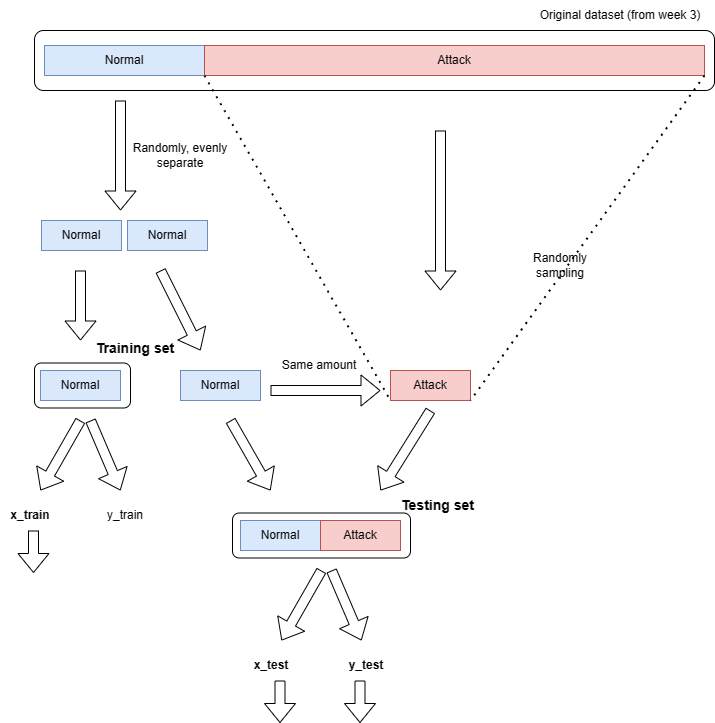

In [ ]:
# import random
# #replace natural with 0 and attack with 1 in dataset
# normal_replace = data_before_split.replace(regex=['Natural'],value='0')
# replaced_data = normal_replace.replace(regex=['Attack'],value='1')


In [ ]:
# # Todo
# import numpy as np
# from sklearn.model_selection import train_test_split
# #from sklearn.inspection import permutation_importance

# X = replaced_data.drop('marker', axis=1)
# y = replaced_data['marker']

# #select only normal data
# normal_data = replaced_data[replaced_data['marker'] == '0']

# #split normal data into two for training set and then testing set
# X_train = normal_data[:504] #randomize
# y_train = X_train
# normal_testing_data = normal_data[504:] #randomize

# #select only attack data
# attack_data = replaced_data[replaced_data['marker'] == '1']
#  #sample only 504 attack instances randomly
# attack_testing = attack_data.sample(n=504, random_state=1)

# #combine previously split normal and attack data for testing
# #.append still works for now
# X_test = normal_testing_data.append(attack_testing)
# y_test = normal_testing_data.append(attack_testing)


# copy_data.describe()

In [ ]:
# this is how I did mine I'm not sure how right it is though
# This is correct, only minor error: X should be the data without label.
import numpy as np
# from sklearn.model_selection import train_test_split

replaced_values = {'Natural' : 0, 'Attack': 1} # changing values in marker column
copy_data_replaced = copy_data.copy() # copying data from week 3
copy_data_replaced = copy_data_replaced.replace({'marker': replaced_values}) # replacing values in marker column

#creating X and y values
X = copy_data_replaced
y = copy_data_replaced['marker']

# splitting the training and testing data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
normal = copy_data_replaced.loc[copy_data_replaced['marker'] == 0]   # splicing normal data from dataset
attack = copy_data_replaced.loc[copy_data_replaced['marker'] == 1]   # splicing attack data from dataset

# sample it twice cannot gurantee there are not overlapping.
normal = normal.sample(frac=1)  # making training data 50% of normal data
# find the middle
middle = len(normal) // 2

# split the normal
train = normal.iloc[:middle]
X_train = train.iloc[:,:116] # remove the label column

y_train = train['marker'] # useless in semi-supervised anomaly detection
normal_test = normal.iloc[middle:]   # Should be "middle:" not ":middle"
attack_test = attack.sample(n = normal_test.shape[0])    # selecting same samples of attack data

# combining the dataframes
testing_data = [normal_test, attack_test]  #creating a list of the dataframes
X_test = pd.concat(testing_data).iloc[:,:116] # combining normal and attack
y_test = pd.concat(testing_data)['marker']


In [ ]:
# X_train, y_train = X_train.iloc[:,:116], X_train['marker']
# y_train
print(f'Shape: \nX_train:{X_train.shape}\nX_test:{X_test.shape}')
print(f'Check the labels: \nsum of the y_train, should be 0: {y_train.sum()}\nsum of the y_test, should be half length of the testing set (half 0 and half 1): {y_test.sum()}')

Shape: 
X_train:(504, 116)
X_test:(1008, 116)
Check the labels: 
sum of the y_train, should be 0: 0
sum of the y_test, should be half length of the testing set (half 0 and half 1): 504


## Normalization
- Fit the model with training data
- Transform both training and testing data using fitted scaler

In [ ]:
# Todo
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()    # create a scaler object

scaler.fit(X_train)       #  fit on training data

X_train_scaled = scaler.transform(X_train)   # transform both traing and testing data using fitted scaler
X_test_scaled = scaler.transform(X_test)

## Feature Extraction (PCA)
### When implementing this, move this and following code blocks right before the machine learning part (after normalization)!

- Uncomment the following code block if you are not testing the PCA feature extraction!

In [ ]:

# from sklearn.decomposition import PCA
# pca = PCA(n_components=29)

# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)


## Feature Extraction (Auto-Encoder)
- Uncomment the following 3 code blocks if you are not testing the Auto-encoder feature extraction!

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.models import Model

# # Dimension of input and output
# input_dim = 116

# # Dimension of encoder layers
# encoding_dim1 = 58
# encoding_dim2 = 29

# # Define input layer
# input_layer = Input(shape=(input_dim,))

# # Define encoding layers
# encoder_layer1 = Dense(encoding_dim1, activation='linear')(input_layer)
# encoder_layer2 = Dense(encoding_dim2, activation='linear')(encoder_layer1)

# # Define decoding layers
# decoder_layer1 = Dense(encoding_dim1, activation='linear')(encoder_layer2)
# decoder_layer2 = Dense(input_dim, activation='linear')(decoder_layer1)

# # Create the autoencoder model
# autoencoder = Model(inputs=input_layer, outputs=decoder_layer2)

# # Compile the model
# autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
# #assuming x_train is your input data
# autoencoder.fit(X_train_scaled, X_train_scaled,
#                 epochs=100,
#                 batch_size=20,
#                 shuffle=True)

# # Define the encoder model
# encoder = Model(inputs=input_layer, outputs=encoder_layer2)

In [ ]:
#Extract features with trained auto-encoder network with only encoder part.
# X_train_scaled = encoder.predict(X_train_scaled)
# X_test_scaled = encoder.predict(X_test_scaled)


## Machine Learning and Evaluation
### **Week 5**
- What we have now:
  - `X_train_scaled`: The normalized training data.
  - `X_test_scaled`: The normalized testing data.
  - `y_train`: Label of the training data, all 0, should not use.
  - `y_test`: Label of the testing data, binary label contains 0 and 1.
- Test machine learning algorithms with our processed data.
  - pyOD library:
    - https://pyod.readthedocs.io/en/latest/index.html
  - Three assigned algorithms will be tested in our project (each team member test one, you can claim your choice here, double click the block for editing):
    - K-nearest-neighbor (KNN) Jacqueline Chavez
    - Angle-based outlier detection (ABOD) Alanah Cheng
    - One class support vector machine (OCSVM) Angelah Magofna
  - Test extra three algorithms from pyod library or the paper (each team member test one, you can claim your choice here).
    
    -Isolation Forest (Jacqueline Chavez)
    -  CBLOF (Angelah Magofna)
    -
  - `fit()` the model with training data (`x_train`).
  - Test the model with testing data (`x_test`) and get their anomaly score with `decision_function()` (do not use predict function).
- Compute the AUC score
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
  - Here `y_true` is the data we processed from last week (`y_test`), `y_score` is the anomaly score you just get.
  - AUC score is range from 0 to 1, the higher the better.
- Then adjust the parameter of the algorithms to improve the AUC score. Read the paper and understand the principle of the algorithms might help.

In [ ]:
# check if pyod is installed correctly
import pyod

In [ ]:
# put your 2 models with well adjusted parameter here!
# e.g.: KNN(n_neighbors=xxx)
# And of course the evaluation process to get the AUC score
# Todo
#KNN
from pyod.models.knn import KNN
#improved parameters
clf = KNN(n_neighbors= 5, algorithm="auto")
#fit model
clf.fit(X_train_scaled)
y_pred_scoreknn = clf.decision_function(X_test_scaled)


from sklearn.metrics import roc_auc_score
#AUC score
roc_auc_score(y_test, y_pred_scoreknn)


0.6931138196019149

In [ ]:
# OCSVM algorithm
from pyod.models.ocsvm import OCSVM

clf_OCSVM = OCSVM(kernel='rbf', gamma=100)  # adjusted parameters
clf_OCSVM.fit(X_train_scaled) # fitting model

y_pred_scoreocsvm = clf_OCSVM.decision_function(X_test_scaled) # test model with testing data

from sklearn.metrics import roc_auc_score
# AUC score
roc_auc_score(y_test, y_pred_scoreocsvm)

0.805045745149912

In [ ]:
from pyod.models.gmm import GMM
from pyod.utils.data import generate_data

clf_gmm = GMM(n_components=500)
clf_gmm.fit(X_train_scaled)
Y_pred_scoregmm = clf_gmm.decision_function(X_test_scaled)

from sklearn.metrics import roc_auc_score
# evaluation with AUC score
roc_auc_score(y_test, Y_pred_scoregmm)

0.8075514928193499

In [ ]:
# # CBLOF algorithm
# from pyod.models.cblof import CBLOF

# clf_CBLOF = CBLOF(n_clusters=100, alpha=0.9, beta=5) # improved parameters
# clf_CBLOF.fit(X_train_scaled)  # fitting the model
# y_pred_scorecblof = clf_CBLOF.decision_function(X_test_scaled)   # testing model with testing data
# # AUC score
# roc_auc_score(y_test, y_pred_scorecblof)

In [ ]:

# #isolation forest
# from pyod.models.iforest import IsolationForest
# #improved parameters
# model=IsolationForest(n_estimators=100,max_samples='auto')
# #fit model
# model.fit(X_train_scaled)
# #get parameters
# print(model.get_params())
# results = model.decision_function(X_test_scaled)
# #AUC score
# roc_auc_score(y_test, results)

In [ ]:
#ABOD algorithm from Alanah
# import pyod
# from pyod.models.abod import ABOD
# from pyod.utils.data import generate_data


# clf_abod = ABOD()
# clf_abod.fit(X_train_scaled)
# Y_pred_score = clf_abod.decision_function(X_test_scaled)

# from sklearn.metrics import roc_auc_score
# # evaluation with AUC score
# roc_auc_score(y_test, Y_pred_score)

## Plot the ROC curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# roc curve for isolation forest
# fpr, tpr, thresholds = roc_curve(y_test,results, pos_label=1)
# roc_auc = auc(fpr, tpr)

#roc curve for knn
fprknn, tprknn, thresholdsknn = roc_curve(y_test,y_pred_scoreknn, pos_label=1)
roc_aucknn = auc(fprknn, tprknn)

# # roc curve for OCSVM
fpr_OCSVM, tpr_OCSVM, thresholds_OCSVM = roc_curve(y_test, y_pred_scoreocsvm, pos_label=1)
roc_auc_OCSVM = auc(fpr_OCSVM, tpr_OCSVM)

# roc curve for CBLOF
# fpr_CBLOF, tpr_CBLOF, thresholds_CBLOF = roc_curve(y_test, y_pred_scorecblof, pos_label=1)
# roc_auc_CBLOF = auc(fpr_CBLOF, tpr_CBLOF)

# roc curve for GMM
fpr_GMM, tpr_GMM, thresholds_GMM = roc_curve(y_test, Y_pred_scoregmm, pos_label=1)
roc_auc_GMM = auc(fpr_GMM, tpr_GMM)

#graph
fig, ax = plt.subplots(figsize=(7.5, 7.5))

plt.plot(fprknn, tprknn, label='ROC Curve for K-nearest-neighbor')
# plt.plot(fpr, tpr, label='ROC Curve for IsolationForest')
plt.plot(fpr_OCSVM, tpr_OCSVM, label='ROC Curve for OCSVM')    # plot for OCSVM
# plt.plot(fpr_CBLOF, tpr_CBLOF, label='ROC Curve for CBLOF')    # plot for CBLOF
plt.plot(fpr_GMM, tpr_GMM, label='ROC Curve for GMM')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('ROC CURVE')
plt.show()

NameError: ignored

In [ ]:
# # ROC curve graph for OCSVM and CBLOF
# import matplotlib.pyplot as plt
#  from sklearn.metrics import roc_curve, auc

# #roc curve for OCSVM
# fpr_OCSVM, tpr_OCSVM, thresholds_OCSVM = roc_curve(y_test, y_pred_scoreocsvm, pos_label=1)
# roc_auc_OCSVM = auc(fpr_OCSVM, tpr_OCSVM)

# #roc curve for CBLOF
# fpr_CBLOF, tpr_CBLOF, thresholds_CBLOF = roc_curve(y_test, y_pred_scorecblof, pos_label=1)
#  roc_auc_CBLOF = auc(fpr_CBLOF, tpr_CBLOF)

# # plotting
#  plt.title('ROC Curve')  # adding plot title
#  plt.plot(fpr_OCSVM, tpr_OCSVM, label='ROC Curve for OCSVM')    # plot for OCSVM
#  plt.plot(fpr_CBLOF, tpr_CBLOF, label='ROC Curve for CBLOF')    # plot for CBLOF
#  plt.legend(loc='lower right')   # locking legend to lower right position
#  plt.xlim([0, 1])# plt.ylim([0, 1])
#  plt.ylabel('True Positive Rate')   # naming y label
#  plt.xlabel('False Positive Rate')   # naming x label
#  plt.show()

(0.55, 0.87)

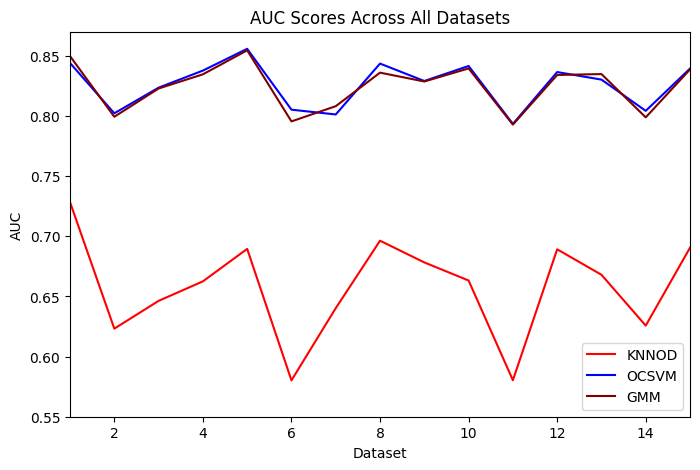

In [ ]:
import matplotlib.pyplot as plt
y_axisknn = [0.7283, .6232, .6463, .6625, .6895, .5802, 0.640226229, 0.696292476, 0.678251317, 0.663220622, 0.580319433, 0.689148406, 0.667996729, 0.62572146, 0.690506089]
y_axisocsvm = [.8440, 0.8022, 0.8235, 0.8377, 0.8558, .8052, 0.801229111, 0.843516531, 0.829034915, 0.841520889, 0.793369492, 0.836465505, 0.830201877, 0.80424022, 0.839408258]
y_axis_gmm = [.849731, 0.799308,  0.822803, 0.834585, 0.854536, 0.795464, 0.808111684, 0.835979735, 0.828629097, 0.839498311, 0.792789743, 0.834045391, 0.834810463, 0.798829547, 0.838661918]
x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
plt.figure(num = 3, figsize=(8, 5))
plt.plot(x_axis, y_axisknn, color = 'red', label = 'KNNOD')
plt.plot(x_axis, y_axisocsvm, color='blue', label='OCSVM')
plt.plot(x_axis, y_axis_gmm, color ='maroon', label = 'GMM')
plt.xlabel('Dataset')
plt.ylabel('AUC')
plt.title('AUC Scores Across All Datasets')
plt.legend(loc="lower right")
plt.xlim((1, 15))
plt.ylim((.55, .87))

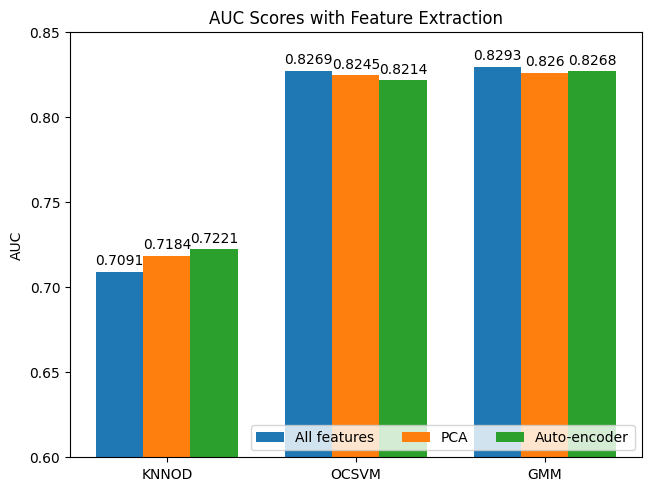

In [ ]:
import numpy as np
algos = ("KNNOD", "OCSVM", "GMM")
algos_avg = {
    'All features': (.7091, 0.8269, 0.8293),
    'PCA': (0.7184, 0.8245, 0.8260),
    'Auto-encoder': (.7221, 0.8214, 0.8268),
}
x = np.arange(len(algos))
width = 0.25
fig, ax = plt.subplots(layout='constrained')

#loop through python dictionary
multiplier = 0
for attribute, measurement in algos_avg.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# labels, title and x-axis tick labels
ax.set_ylabel('AUC')
ax.set_ylim(0.6, 0.85)
ax.set_title('AUC Scores with Feature Extraction')
ax.set_xticks(x + width, algos)
ax.legend(loc='lower right', ncols=3)